# Loading libraries

In [26]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import roc_auc_score, classification_report
import warnings
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import roc_auc_score, roc_curve
import matplotlib.pyplot as plt
import re
warnings.filterwarnings('ignore')

# Loading data

In [28]:
# === Load preselected SNP data === #
data = pd.read_csv("C:/Users/bciez/Documents/Basilio/Columbia_University/MLdosage/CAR/SNP_coding_chr1_chr22_onehot_WithPheno.csv")  # Replace with your full merged dataset if needed

# === Define features and target === #
# Option 1: Drop rows with any NaNs in X or y
data_clean = data.dropna()
data = data_clean.copy()
X = data_clean.drop(columns=["IID", "ADRD"])
X = data.drop(columns=["FID","IID","AGE","SEX","APOE4","ADRD","PC1","PC2","PC3","PC4"])  # Replace 'ADRD_FINAL' with your phenotype column
y = data["ADRD"]
print(data.shape)


(2609, 2783)


In [29]:
X.head()

,chr1:2284767:G:A_A_0,chr1:2284767:G:A_A_1,chr1:2284767:G:A_A_2,chr1:3388452:C:T_T_0,chr1:3388452:C:T_T_1,chr1:3388452:C:T_T_2,chr1:3388902:C:A_A_0,chr1:3388902:C:A_A_1,chr1:3388902:C:A_A_2,chr1:29784378:T:C_C_0,...,chr22:50499364:G:A_A_2,chr22:50501479:TA:T_TA_0,chr22:50501479:TA:T_TA_1,chr22:50501479:TA:T_TA_2,chr22:50501578:A:G_A_0,chr22:50501578:A:G_A_1,chr22:50501578:A:G_A_2,chr22:50629837:G:A_A_0,chr22:50629837:G:A_A_1,chr22:50629837:G:A_A_2
0,True,False,False,True,False,False,True,False,False,False,...,True,False,False,True,False,False,True,True,False,False
1,True,False,False,False,True,False,False,True,False,False,...,False,False,True,False,False,True,False,True,False,False
2,True,False,False,False,True,False,False,True,False,False,...,False,False,True,False,False,True,False,True,False,False
3,True,False,False,True,False,False,True,False,False,True,...,False,True,False,False,True,False,False,True,False,False
4,True,False,False,False,True,False,False,True,False,True,...,False,True,False,False,True,False,False,True,False,False


In [30]:
y.head()

0    1
1    1
2    1
3    1
4    1
Name: ADRD, dtype: int64

# Split data

In [31]:
# Check for NaNs or infinite values
print("NaNs in X:", X.isnull().sum().sum())
print("NaNs in y:", y.isnull().sum())
print("Infinite values in X:", np.isinf(X).sum().sum())


# Option 2 (alternative): Fill NaNs (optional)
# X = X.fillna(0)

# Check again
print("After cleaning - NaNs in X:", X.isnull().sum().sum())
print("After cleaning - NaNs in y:", y.isnull().sum())


NaNs in X: 0
NaNs in y: 0
Infinite values in X: 0
After cleaning - NaNs in X: 0
After cleaning - NaNs in y: 0


In [32]:
data_clean = data.dropna()
data = data_clean.copy()
# Sanitize column names
X.columns = [re.sub(r'[^\w]', '_', col) for col in X.columns]

In [33]:
X

,chr1_2284767_G_A_A_0,chr1_2284767_G_A_A_1,chr1_2284767_G_A_A_2,chr1_3388452_C_T_T_0,chr1_3388452_C_T_T_1,chr1_3388452_C_T_T_2,chr1_3388902_C_A_A_0,chr1_3388902_C_A_A_1,chr1_3388902_C_A_A_2,chr1_29784378_T_C_C_0,...,chr22_50499364_G_A_A_2,chr22_50501479_TA_T_TA_0,chr22_50501479_TA_T_TA_1,chr22_50501479_TA_T_TA_2,chr22_50501578_A_G_A_0,chr22_50501578_A_G_A_1,chr22_50501578_A_G_A_2,chr22_50629837_G_A_A_0,chr22_50629837_G_A_A_1,chr22_50629837_G_A_A_2
0,True,False,False,True,False,False,True,False,False,False,...,True,False,False,True,False,False,True,True,False,False
1,True,False,False,False,True,False,False,True,False,False,...,False,False,True,False,False,True,False,True,False,False
2,True,False,False,False,True,False,False,True,False,False,...,False,False,True,False,False,True,False,True,False,False
3,True,False,False,True,False,False,True,False,False,True,...,False,True,False,False,True,False,False,True,False,False
4,True,False,False,False,True,False,False,True,False,True,...,False,True,False,False,True,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2604,True,False,False,False,True,False,False,True,False,False,...,False,True,False,False,True,False,False,True,False,False
2605,True,False,False,False,True,False,False,True,False,True,...,False,True,False,False,True,False,False,True,False,False
2606,True,False,False,True,False,False,True,False,False,True,...,False,True,False,False,True,False,False,True,False,False
2607,False,True,False,False,False,True,False,False,True,False,...,False,True,False,False,True,False,False,True,False,False


In [34]:
# === Split data === #
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.3, random_state=42)
X_train


,chr1_2284767_G_A_A_0,chr1_2284767_G_A_A_1,chr1_2284767_G_A_A_2,chr1_3388452_C_T_T_0,chr1_3388452_C_T_T_1,chr1_3388452_C_T_T_2,chr1_3388902_C_A_A_0,chr1_3388902_C_A_A_1,chr1_3388902_C_A_A_2,chr1_29784378_T_C_C_0,...,chr22_50499364_G_A_A_2,chr22_50501479_TA_T_TA_0,chr22_50501479_TA_T_TA_1,chr22_50501479_TA_T_TA_2,chr22_50501578_A_G_A_0,chr22_50501578_A_G_A_1,chr22_50501578_A_G_A_2,chr22_50629837_G_A_A_0,chr22_50629837_G_A_A_1,chr22_50629837_G_A_A_2
1100,True,False,False,True,False,False,True,False,False,True,...,False,True,False,False,True,False,False,True,False,False
1200,True,False,False,False,True,False,False,True,False,True,...,False,False,True,False,False,True,False,True,False,False
2564,True,False,False,True,False,False,True,False,False,False,...,False,True,False,False,True,False,False,True,False,False
2134,True,False,False,True,False,False,True,False,False,False,...,False,True,False,False,True,False,False,True,False,False
269,True,False,False,True,False,False,True,False,False,True,...,False,False,True,False,False,True,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2247,True,False,False,True,False,False,True,False,False,False,...,False,False,True,False,False,True,False,True,False,False
2035,True,False,False,True,False,False,True,False,False,False,...,False,False,True,False,False,True,False,True,False,False
2225,True,False,False,True,False,False,True,False,False,True,...,False,False,True,False,False,True,False,True,False,False
2239,True,False,False,True,False,False,True,False,False,False,...,False,False,True,False,False,True,False,True,False,False


# Logistic Regression Models

In [35]:
# === Logistic Regression Models === #
models = {
    "Logistic_Lasso": LogisticRegression(penalty='l1', solver='saga', max_iter=1000),
    "Logistic_Ridge": LogisticRegression(penalty='l2', solver='saga', max_iter=1000),
    "Logistic_ElasticNet": LogisticRegression(penalty='elasticnet', solver='saga', l1_ratio=0.5, max_iter=1000),
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric='logloss'),
    "LightGBM": LGBMClassifier(),
    "CatBoost": CatBoostClassifier(verbose=0),
    "NeuralNetwork": MLPClassifier(hidden_layer_sizes=(100, 50), max_iter=300)
}

# Fitting


🔎 Performing cross-validation for Logistic_Lasso...
✅ Best hyperparameters for Logistic_Lasso: {'C': 1, 'penalty': 'l1'}


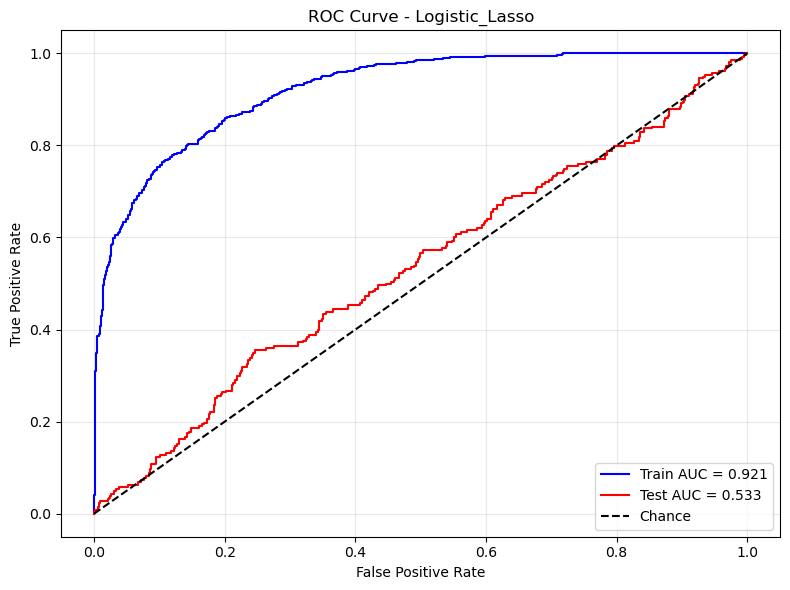

📊 Logistic_Lasso - Train AUC: 0.9212 | Test AUC: 0.5329

🔎 Performing cross-validation for Logistic_Ridge...
✅ Best hyperparameters for Logistic_Ridge: {'C': 0.01, 'penalty': 'l2'}


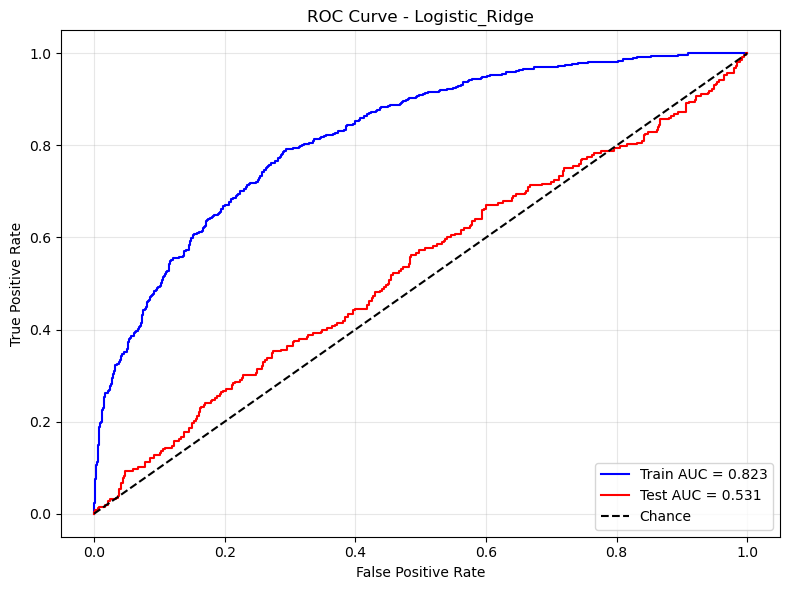

📊 Logistic_Ridge - Train AUC: 0.8228 | Test AUC: 0.5312

🔎 Performing cross-validation for Logistic_ElasticNet...
✅ Best hyperparameters for Logistic_ElasticNet: {'C': 1, 'penalty': 'elasticnet'}


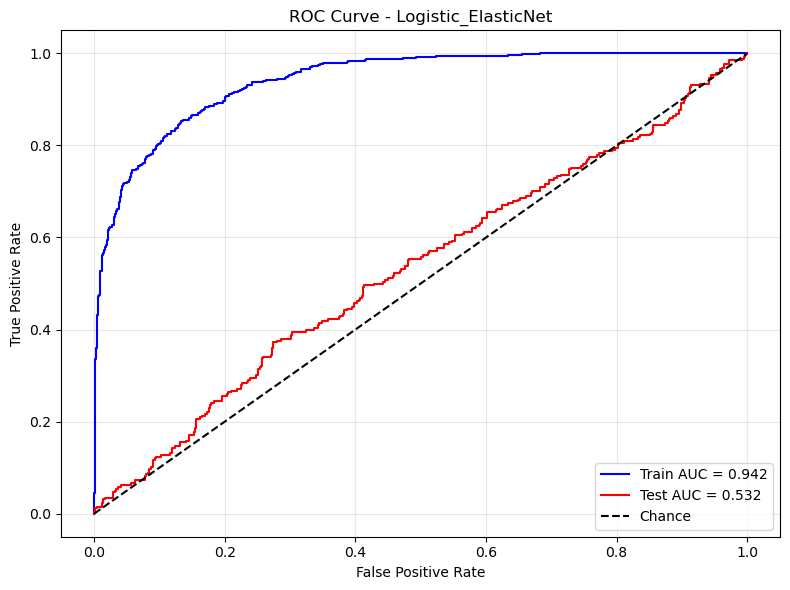

📊 Logistic_ElasticNet - Train AUC: 0.9418 | Test AUC: 0.5317

🔎 Performing cross-validation for XGBoost...
✅ Best hyperparameters for XGBoost: {'learning_rate': 0.01, 'n_estimators': 50}


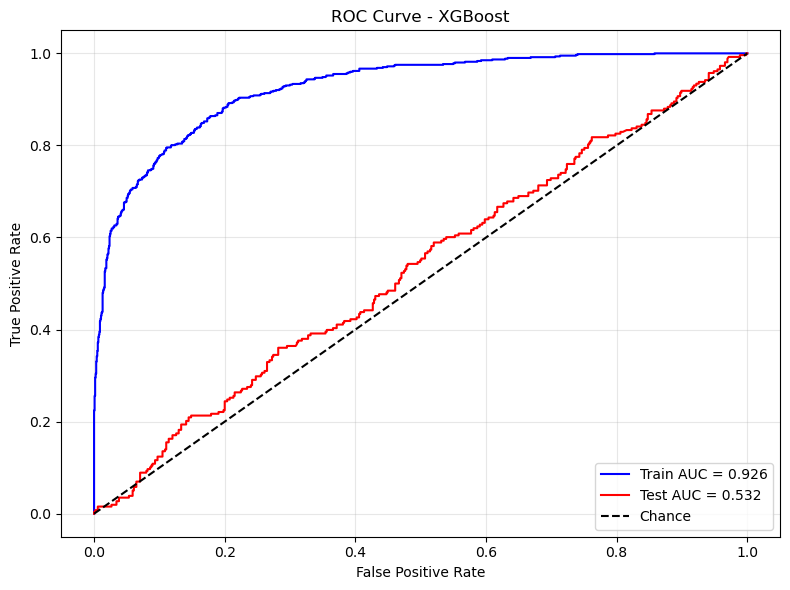

📊 XGBoost - Train AUC: 0.9258 | Test AUC: 0.5318

🔎 Performing cross-validation for LightGBM...
[LightGBM] [Info] Number of positive: 602, number of negative: 1224
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.019069 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 4534
[LightGBM] [Info] Number of data points in the train set: 1826, number of used features: 2267
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.329682 -> initscore=-0.709622
[LightGBM] [Info] Start training from score -0.709622
✅ Best hyperparameters for LightGBM: {'learning_rate': 0.01, 'n_estimators': 100}


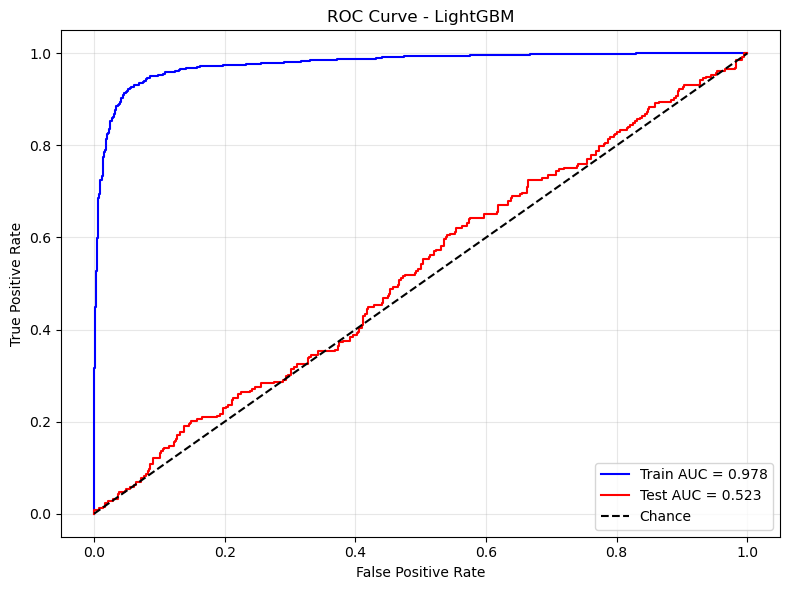

📊 LightGBM - Train AUC: 0.9778 | Test AUC: 0.5234

🔎 Performing cross-validation for CatBoost...
✅ Best hyperparameters for CatBoost: {'depth': 8, 'learning_rate': 0.01}


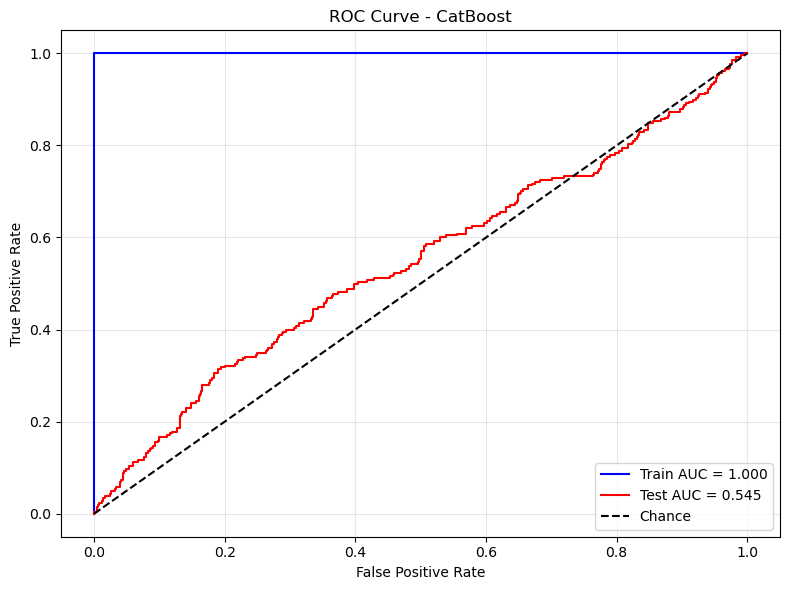

📊 CatBoost - Train AUC: 1.0000 | Test AUC: 0.5455

🔎 Performing cross-validation for NeuralNetwork...
✅ Best hyperparameters for NeuralNetwork: {'hidden_layer_sizes': (100, 50)}


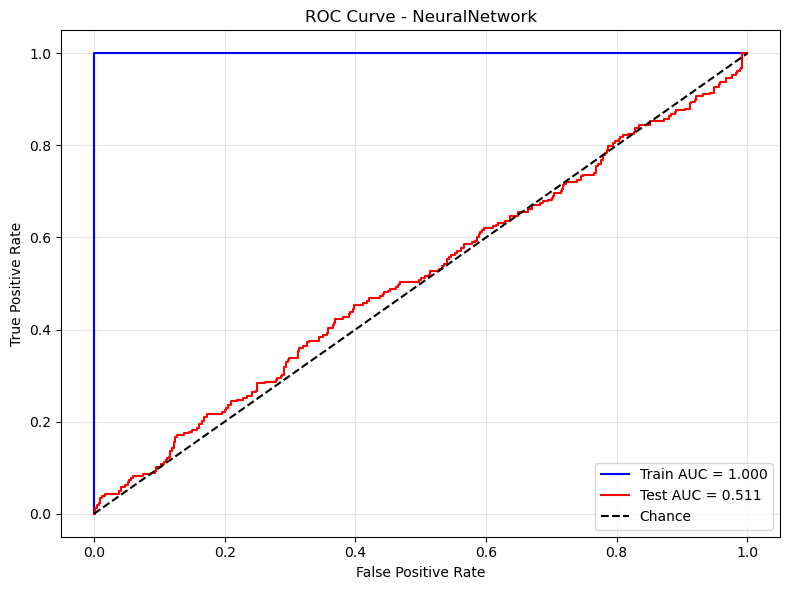

📊 NeuralNetwork - Train AUC: 1.0000 | Test AUC: 0.5107


In [36]:
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
from sklearn.model_selection import StratifiedKFold, GridSearchCV, train_test_split
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import roc_auc_score, roc_curve
import warnings
warnings.filterwarnings('ignore')

'''
# === Load and clean data === #
data = pd.read_csv("SNP_preselected_chr22.csv")
data_clean = data.dropna()
X = data_clean.drop(columns=["IID", "ADRD"])
y = data_clean["ADRD"]

# Sanitize feature names
X.columns = [re.sub(r'[^\w]', '_', col) for col in X.columns]

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, stratify=y, test_size=0.2, random_state=42
)

'''

# === Define models and hyperparameter grids === #
param_grids = {
    "Logistic_Lasso": {
        "model": LogisticRegression(solver='saga', max_iter=1000),
        "params": {"penalty": ["l1"], "C": [0.01, 0.1, 1, 10]}
    },
    "Logistic_Ridge": {
        "model": LogisticRegression(solver='saga', max_iter=1000),
        "params": {"penalty": ["l2"], "C": [0.01, 0.1, 1, 10]}
    },
    "Logistic_ElasticNet": {
        "model": LogisticRegression(solver='saga', max_iter=1000, l1_ratio=0.5),
        "params": {"penalty": ["elasticnet"], "C": [0.01, 0.1, 1, 10]}
    },
    "XGBoost": {
        "model": XGBClassifier(use_label_encoder=False, eval_metric='logloss'),
        "params": {"n_estimators": [50, 100, 200], "learning_rate": [0.01, 0.1, 0.2]}
    },
    "LightGBM": {
        "model": LGBMClassifier(),
        "params": {"n_estimators": [50, 100, 200], "learning_rate": [0.01, 0.1, 0.2]}
    },
    "CatBoost": {
        "model": CatBoostClassifier(verbose=0),
        "params": {"depth": [4, 6, 8], "learning_rate": [0.01, 0.1, 0.2]}
    },
    "NeuralNetwork": {
        "model": MLPClassifier(max_iter=500),
        "params": {"hidden_layer_sizes": [(50,), (100,), (100, 50)]}
    }
}

# === Cross-validation setup === #
cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

# === Train, evaluate, and plot ROC curves === #
for name, config in param_grids.items():
    print(f"\n🔎 Performing cross-validation for {name}...")
    
    grid_search = GridSearchCV(
        config["model"], config["params"], cv=cv, scoring='roc_auc', n_jobs=-1
    )
    
    grid_search.fit(X_train, y_train)  # Cross-validation on training set
    best_model = grid_search.best_estimator_  # Select best model from CV
    
    print(f"✅ Best hyperparameters for {name}: {grid_search.best_params_}")

    # Predict probabilities using the best model
    y_train_pred = best_model.predict_proba(X_train)[:, 1]
    y_test_pred = best_model.predict_proba(X_test)[:, 1]

    # AUC scores
    auc_train = roc_auc_score(y_train, y_train_pred)
    auc_test = roc_auc_score(y_test, y_test_pred)

    # ROC curves
    fpr_train, tpr_train, _ = roc_curve(y_train, y_train_pred)
    fpr_test, tpr_test, _ = roc_curve(y_test, y_test_pred)

    # Plotting
    plt.figure(figsize=(8, 6))
    plt.plot(fpr_train, tpr_train, label=f"Train AUC = {auc_train:.3f}", color='blue')
    plt.plot(fpr_test, tpr_test, label=f"Test AUC = {auc_test:.3f}", color='red')
    plt.plot([0, 1], [0, 1], "k--", label="Chance")
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title(f"ROC Curve - {name}")
    plt.legend(loc="lower right")
    plt.grid(alpha=0.3)
    plt.tight_layout()
    plt.savefig(f"../output/plots/ROC_{name}_WithCV.png")
    plt.show()

    print(f"📊 {name} - Train AUC: {auc_train:.4f} | Test AUC: {auc_test:.4f}")


# Evaluation of feature importance

In [22]:
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
from sklearn.model_selection import StratifiedKFold, cross_val_score
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.inspection import permutation_importance
from sklearn.metrics import roc_auc_score
import warnings
warnings.filterwarnings('ignore')

In [23]:
X

,chr1_14993789_C_T_C_0,chr1_14993789_C_T_C_1,chr1_14993789_C_T_C_2,chr1_42835783_G_A_A_0,chr1_42835783_G_A_A_1,chr1_56080004_T_C_C_0,chr1_56080004_T_C_C_1,chr1_56080004_T_C_C_2,chr1_62220543_C_T_T_0,chr1_62220543_C_T_T_1,...,chr22_41583482_C_T_T_2,chr22_41587851_A_G_G_0,chr22_41587851_A_G_G_1,chr22_41587851_A_G_G_2,chr22_41590422_G_A_A_0,chr22_41590422_G_A_A_1,chr22_41590422_G_A_A_2,chr22_41642253_C_A_A_0,chr22_41642253_C_A_A_1,chr22_41642253_C_A_A_2
1,False,True,False,True,False,True,False,False,True,False,...,False,True,False,False,True,False,False,True,False,False
2,True,False,False,True,False,True,False,False,True,False,...,True,False,False,True,False,False,True,False,False,True
3,False,False,True,True,False,True,False,False,True,False,...,False,True,False,False,True,False,False,True,False,False
4,False,True,False,True,False,True,False,False,True,False,...,False,True,False,False,True,False,False,True,False,False
6,True,False,False,True,False,True,False,False,True,False,...,False,True,False,False,True,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1138,False,True,False,True,False,True,False,False,True,False,...,False,True,False,False,True,False,False,True,False,False
1139,False,True,False,True,False,True,False,False,True,False,...,False,True,False,False,True,False,False,True,False,False
1140,True,False,False,True,False,True,False,False,True,False,...,False,False,True,False,False,True,False,False,True,False
1141,False,True,False,True,False,True,False,False,True,False,...,False,True,False,False,True,False,False,True,False,False



Evaluating Logistic_Lasso...
Mean ROC-AUC: 0.9667 ± 0.0089


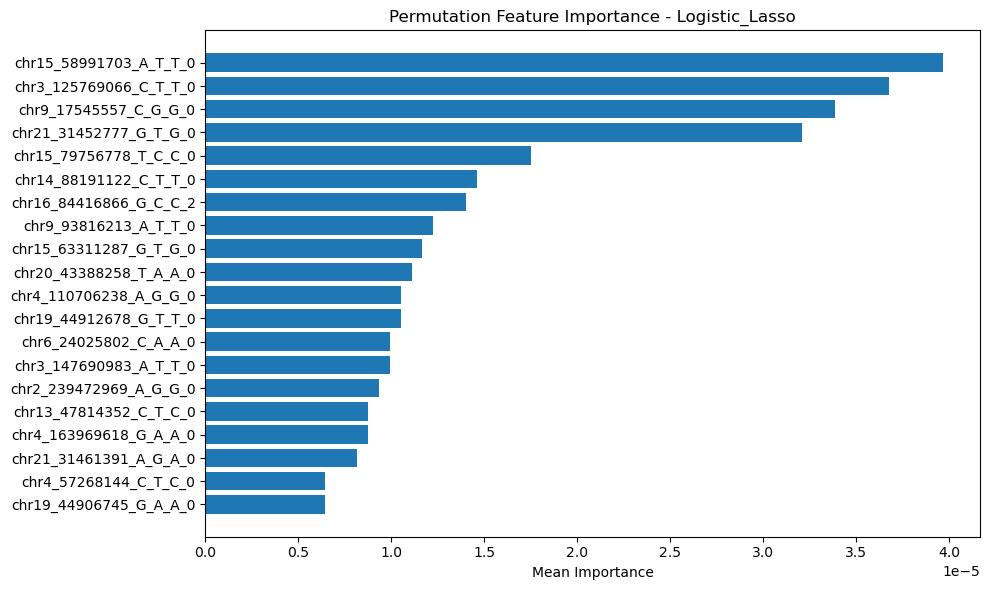


Evaluating Logistic_Ridge...
Mean ROC-AUC: 0.9837 ± 0.0069


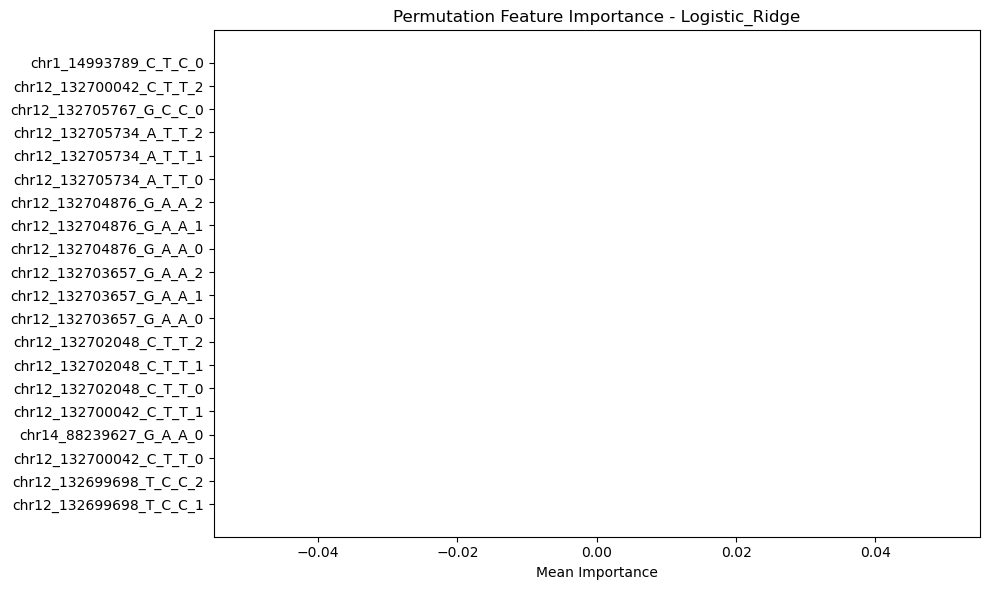


Evaluating Logistic_ElasticNet...
Mean ROC-AUC: 0.9766 ± 0.0083


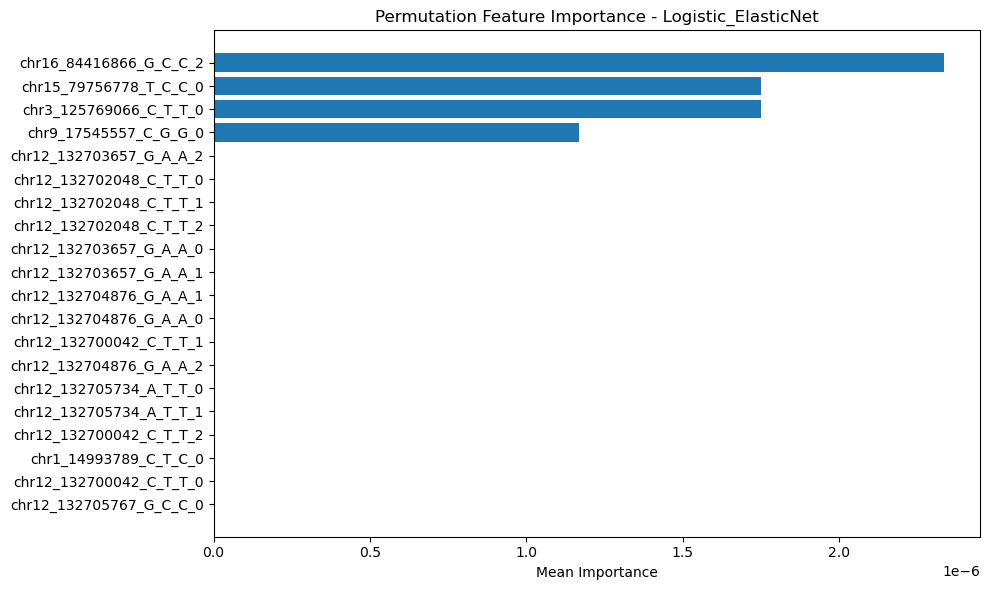


Evaluating XGBoost...
Mean ROC-AUC: 0.9192 ± 0.0173


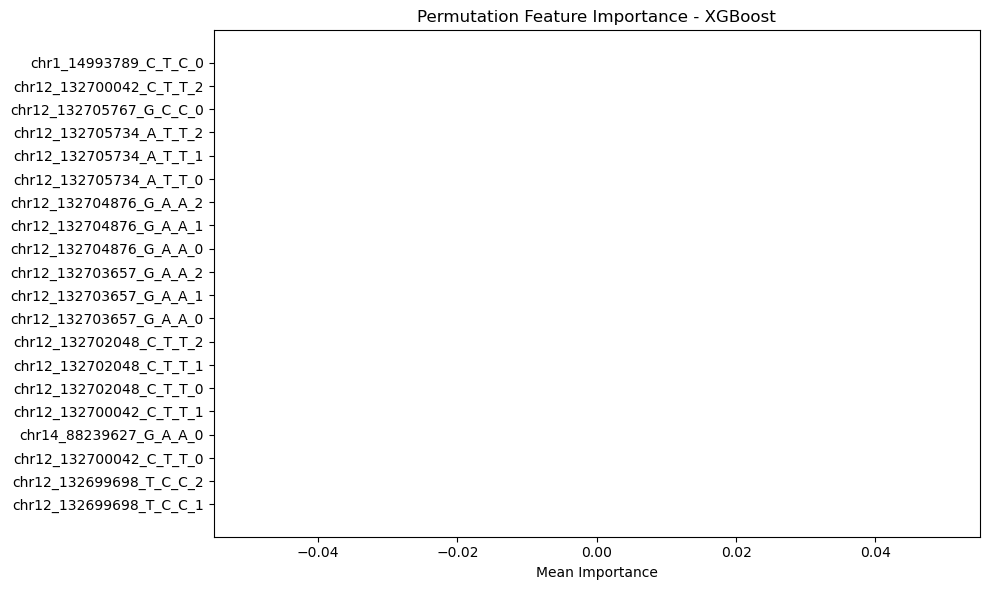


Evaluating LightGBM...
Mean ROC-AUC: 0.9343 ± 0.0224
[LightGBM] [Info] Number of positive: 386, number of negative: 444
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.014739 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3400
[LightGBM] [Info] Number of data points in the train set: 830, number of used features: 1700
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.465060 -> initscore=-0.139987
[LightGBM] [Info] Start training from score -0.139987
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[Light

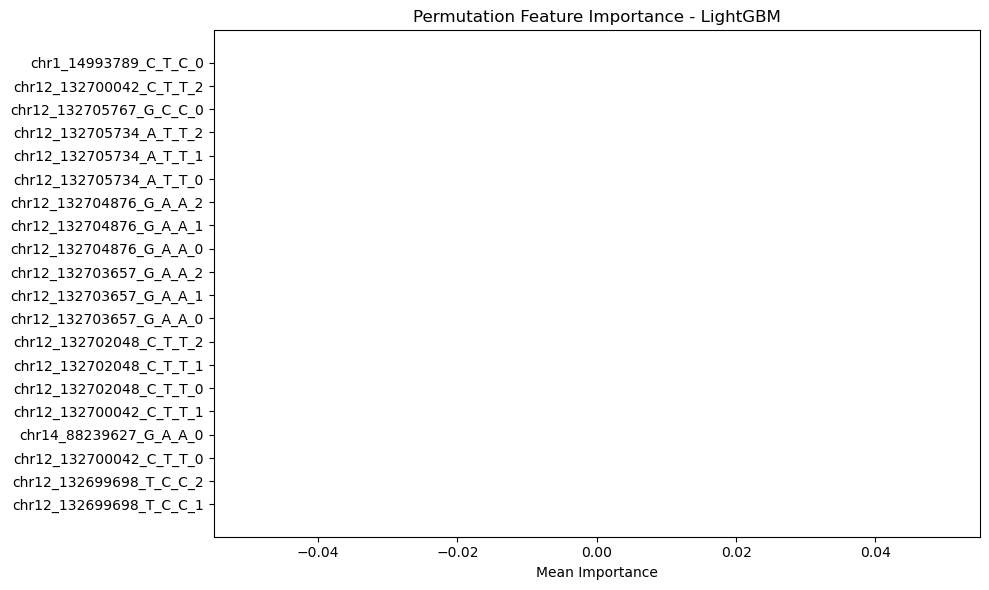


Evaluating CatBoost...
Mean ROC-AUC: 0.9583 ± 0.0114


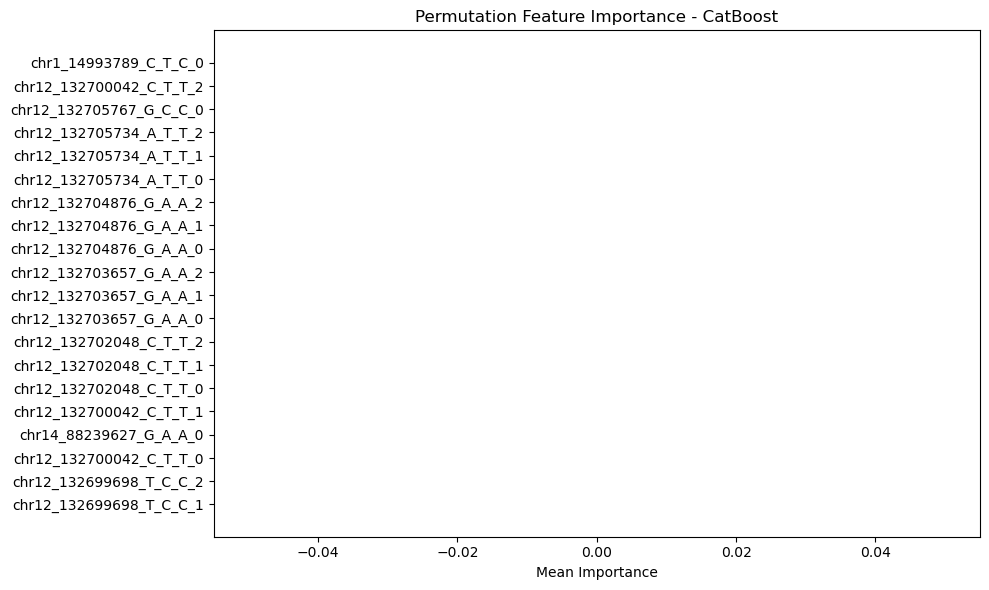


Evaluating NeuralNetwork...
Mean ROC-AUC: 0.9865 ± 0.0074


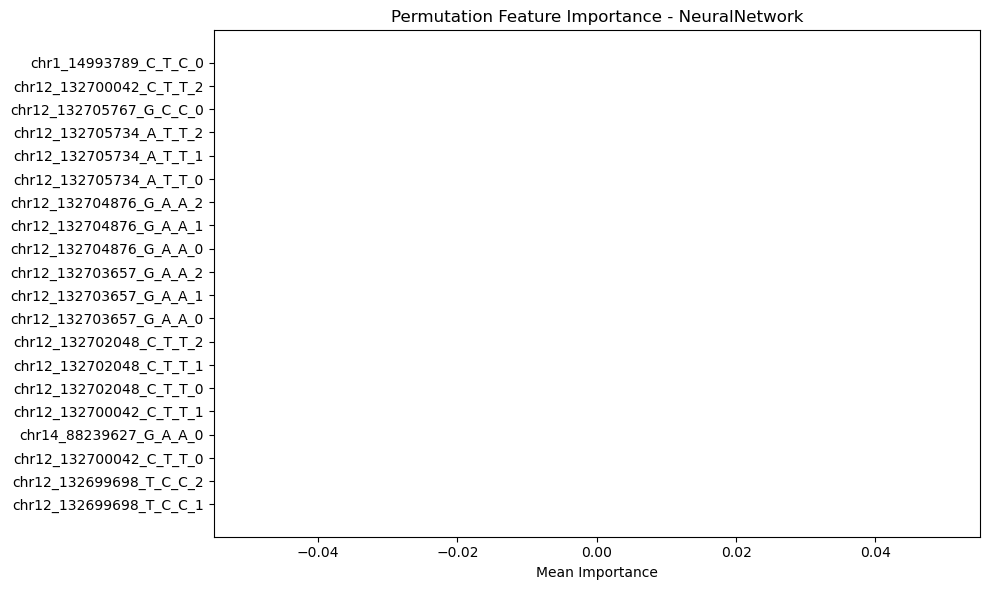

In [24]:
# === Cross-validation setup === #
cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

# === Evaluate models === #
for name, model in models.items():
    print(f"\nEvaluating {name}...")
    
    # Cross-validated ROC-AUC
    auc_scores = cross_val_score(model, X, y, cv=cv, scoring='roc_auc', n_jobs=-1)
    print(f"Mean ROC-AUC: {auc_scores.mean():.4f} ± {auc_scores.std():.4f}")
    
    # Fit the model on the full dataset to get feature importance
    model.fit(X, y)
    
    # Permutation Feature Importance (PFI)
    result = permutation_importance(model, X, y, scoring='roc_auc', n_repeats=10, random_state=42, n_jobs=-1)
    importance_df = pd.DataFrame({
        'Feature': X.columns,
        'Importance': result.importances_mean
    }).sort_values(by='Importance', ascending=False)
    
    # Save feature importance
    importance_df.to_csv(f"PFI_{name}.csv", index=False)
    
    # Plot top 20 features
    plt.figure(figsize=(10, 6))
    plt.barh(importance_df['Feature'][:20][::-1], importance_df['Importance'][:20][::-1])
    plt.xlabel('Mean Importance')
    plt.title(f'Permutation Feature Importance - {name}')
    plt.tight_layout()
    plt.savefig(f"PFI_{name}.png")
    plt.show()